In [ ]:
# Stil to do:
# Improve word2vec replacement function

In [18]:
import pickle
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn
import gensim
from sklearn.manifold import TSNE
import multiprocessing
%matplotlib inline
pd.options.display.max_colwidth = 2000

In [19]:
with open('comments_list.pkl', 'rb') as picklefile:
    comments_list = pickle.load(picklefile)

In [20]:
comments_list[:2]

[('2013-01-30 21:23:28',
  u'how many sneakers do you have @yagobi ??',
  '380633075979217445',
  'lebronxcanary'),
 ('2013-01-30 21:26:00',
  u'@steveekimm not enough... Hahah',
  '380633075979217445',
  'lebronxcanary')]

In [21]:
comments_df = pd.DataFrame(comments_list)
comments_df.columns = ['date_time', 'comment_text', 'media_id','shoe_name']
comments_df['date_time'] = pd.to_datetime(comments_df['date_time'],infer_datetime_format=True)

In [22]:
len(list(comments_df['shoe_name'].unique()))

202

In [23]:
comments_df.dtypes

date_time       datetime64[ns]
comment_text            object
media_id                object
shoe_name               object
dtype: object

In [24]:
comments_df['comment_text'] = comments_df['comment_text'].str.lower()
comments_df.tail(10)

,date_time,comment_text,media_id,shoe_name
15732,2017-01-28 21:21:55,hm for 9.5 or 10,1437991955761826822,adidasultraboostchinesenewyear
15733,2017-01-31 13:27:45,"(solllddd) adidas ultraboost chinese new year limited. size 5,5us. thx to bro. a (surabaya)...😊😊",1440048644631154315,adidasultraboostchinesenewyear
15734,2017-02-02 02:26:25,#adidasultraboost\n#adidas\n#adidasori\n#adidasoriginal\n#jualadidas\n#jualadidasori\n#jualadidasoriginal\n#adidasultraboostcny\n#jualadidasultraboostcny\n#jualadidasultraboostchinesenewyear\n#jualsepatudidas\n#jualsepatuadidasultraboost\n#jualadidasultraboostori\n#jualadidasiltraboostoriginal\n#jualadidasultraboostcnyori\n#jualadidasultraboostcnyoriginal\n#adidasulraboostori\n#adidasultraboostoriginal\n#adidasultraboostcnyori\n#adidasultraboostcnyoriginal\n#jualsepatuadidasmurah\n#adidasultraboostchinesenewyear\n#jualnike\n#jualvans\n#jualasics\n#jualconverse\n#jualpuma\n#adidasultraboostblackwhite\n#adidasultraboostxwoodwood\n#jualadidasultraboostxwoodwood,1441164108203337563,adidasultraboostchinesenewyear
15735,2017-02-02 08:48:33,love them <3,1441164108203337563,adidasultraboostchinesenewyear
15736,2017-02-10 04:57:43,カッコいい❗ちゃんと似合うからスゴい❗,1447009697970660314,adidasultraboostchinesenewyear
15737,2017-02-10 05:24:42,カッコいいですね〜😻👌✨,1447009697970660314,adidasultraboostchinesenewyear
15738,2017-02-10 06:34:40,@akubi4pins ありがとうございます✨嬉しいです😆✌️,1447009697970660314,adidasultraboostchinesenewyear
15739,2017-02-10 06:35:42,@aya.3410 ありがとうございますm(._.)m色とデザインがカッコイイですよね😍👍,1447009697970660314,adidasultraboostchinesenewyear
15740,2017-02-10 20:02:33,ayyy this is sweet! keep up the solid work 👐,1447009697970660314,adidasultraboostchinesenewyear
15741,2017-02-12 05:32:27,👍 👍 👍,1448337057318775749,adidasultraboostchinesenewyear


## Word2Vec

In [25]:
comments_df['comment_list'] = comments_df.comment_text.str.encode('ascii', 'ignore').str.lower()
comments_df['comment_list'] = comments_df.comment_text.str.split(" ")

In [26]:
data = []

In [27]:
for comment in comments_df['comment_list']:
    data.append(comment)

In [28]:
# split so each word is an item in a list
num_features = 80 # how many dimension ( 100 is standard )
context_size = 7 # window to look in
min_word_count = 1
num_workers = multiprocessing.cpu_count()

comment2vec = gensim.models.Word2Vec(
    data,
    size = num_features,
    window = context_size,
    min_count = min_word_count,
    workers = num_workers,
    sg=1,
    seed = 1)

# .most_similar = similar words
# PCA and TSNE to plot

In [29]:
comment2vec.most_similar('dope')

[(u'nice', 0.9981881976127625),
 (u'nice!', 0.9976219534873962),
 (u'\U0001f44c', 0.9974807500839233),
 (u'please', 0.996597409248352),
 (u'awesome', 0.9961418509483337),
 (u'follow', 0.9958705902099609),
 (u'sweet', 0.9956631660461426),
 (u'pic', 0.9956284165382385),
 (u'pic!', 0.9955254197120667),
 (u'my', 0.9953514933586121)]

In [30]:
# some emojis still not being picked up like fist bump and peace sign
emoji_list = []
for i in comments_df.comment_list:
    for j in i:
        k = j.encode('unicode_escape')
        if (b'\\U000' in k[0:5]):
            if j[0:2] not in emoji_list:
                emoji_list.append(j[0:2])

In [31]:
# Replace emojis and words like "dope" with new words based on comment2vec
wlist = ['dope'] + emoji_list
for w in wlist:
    try:
        new_word = str(comment2vec.most_similar(w)[0][0])
#         print(w, new_word)
        ## Replace words with comment2vec
        comments_df['comment_text'] = comments_df['comment_text'].str.replace(w, new_word)
    except:
        continue


In [32]:
comments_df.tail(10)

,date_time,comment_text,media_id,shoe_name,comment_list
15732,2017-01-28 21:21:55,hm for 9.5 or 10,1437991955761826822,adidasultraboostchinesenewyear,"[hm, for, 9.5, or, 10]"
15733,2017-01-31 13:27:45,"(solllddd) adidas ultraboost chinese new year limited. size 5,5us. thx to bro. a (surabaya)...😊😊",1440048644631154315,adidasultraboostchinesenewyear,"[(solllddd), adidas, ultraboost, chinese, , new, year, limited., size, 5,5us., thx, to, bro., a, (surabaya)...😊😊]"
15734,2017-02-02 02:26:25,#adidasultraboost\n#adidas\n#adidasori\n#adidasoriginal\n#jualadidas\n#jualadidasori\n#jualadidasoriginal\n#adidasultraboostcny\n#jualadidasultraboostcny\n#jualadidasultraboostchinesenewyear\n#jualsepatudidas\n#jualsepatuadidasultraboost\n#jualadidasultraboostori\n#jualadidasiltraboostoriginal\n#jualadidasultraboostcnyori\n#jualadidasultraboostcnyoriginal\n#adidasulraboostori\n#adidasultraboostoriginal\n#adidasultraboostcnyori\n#adidasultraboostcnyoriginal\n#jualsepatuadidasmurah\n#adidasultraboostchinesenewyear\n#jualnike\n#jualvans\n#jualasics\n#jualconverse\n#jualpuma\n#adidasultraboostblackwhite\n#adidasultraboostxwoodwood\n#jualadidasultraboostxwoodwood,1441164108203337563,adidasultraboostchinesenewyear,[#adidasultraboost\n#adidas\n#adidasori\n#adidasoriginal\n#jualadidas\n#jualadidasori\n#jualadidasoriginal\n#adidasultraboostcny\n#jualadidasultraboostcny\n#jualadidasultraboostchinesenewyear\n#jualsepatudidas\n#jualsepatuadidasultraboost\n#jualadidasultraboostori\n#jualadidasiltraboostoriginal\n#jualadidasultraboostcnyori\n#jualadidasultraboostcnyoriginal\n#adidasulraboostori\n#adidasultraboostoriginal\n#adidasultraboostcnyori\n#adidasultraboostcnyoriginal\n#jualsepatuadidasmurah\n#adidasultraboostchinesenewyear\n#jualnike\n#jualvans\n#jualasics\n#jualconverse\n#jualpuma\n#adidasultraboostblackwhite\n#adidasultraboostxwoodwood\n#jualadidasultraboostxwoodwood]
15735,2017-02-02 08:48:33,love them <3,1441164108203337563,adidasultraboostchinesenewyear,"[love, them, <3]"
15736,2017-02-10 04:57:43,カッコいい❗ちゃんと似合うからスゴい❗,1447009697970660314,adidasultraboostchinesenewyear,[カッコいい❗ちゃんと似合うからスゴい❗]
15737,2017-02-10 05:24:42,カッコいいですね〜cumashot✨,1447009697970660314,adidasultraboostchinesenewyear,[カッコいいですね〜😻👌✨]
15738,2017-02-10 06:34:40,@akubi4pins ありがとうございます✨嬉しいですig✌️,1447009697970660314,adidasultraboostchinesenewyear,"[@akubi4pins, ありがとうございます✨嬉しいです😆✌️]"
15739,2017-02-10 06:35:42,@aya.3410 ありがとうございますm(._.)m色とデザインがカッコイイですよねpic!,1447009697970660314,adidasultraboostchinesenewyear,"[@aya.3410, ありがとうございますm(._.)m色とデザインがカッコイイですよね😍👍]"
15740,2017-02-10 20:02:33,ayyy this is sweet! keep up the solid work sellers.,1447009697970660314,adidasultraboostchinesenewyear,"[ayyy, this, is, sweet!, keep, up, the, solid, work, 👐]"
15741,2017-02-12 05:32:27,! ! !,1448337057318775749,adidasultraboostchinesenewyear,"[👍, 👍, 👍]"


# Sentiment Analysis

In [33]:
## Try out the different sentiment analyses
analyzer = SentimentIntensityAnalyzer()
afinn = Afinn(emoticons=True)
# Textblob
comments_df['sentiment_textblob'] = comments_df['comment_text'].apply(lambda x: TextBlob(x.strip()).sentiment.polarity)

# Vader
comments_df['sentiment_vader'] = comments_df['comment_text'].apply(lambda x: analyzer.polarity_scores(x.strip())['compound'])

# Afinn
comments_df['sentiment_afinn'] = comments_df['comment_text'].apply(lambda x: afinn.score(x.strip()))

## Output table for web

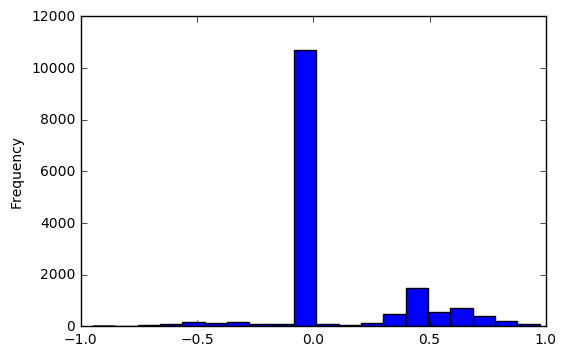

In [38]:
# Still a lot of 0 sentiment
comments_df.sentiment_vader.plot(kind = 'hist', bins=20);

In [39]:
def count_zeroes(colname):
    return len(comments_df.loc[comments_df[colname] == 0, colname])
print(count_zeroes('sentiment_textblob'))
print(count_zeroes('sentiment_vader'))
print(count_zeroes('sentiment_afinn'))

11099
10650
10601


In [40]:
# overall comment count and mean sentiment 
sentsum = comments_df.groupby('shoe_name')['sentiment_vader'].aggregate(['count', 'mean']).reset_index()
# number of comments in last month
recent = comments_df[comments_df.date_time > '2017-02-25']
recent = recent.groupby('shoe_name')['shoe_name'].size().reset_index()
sentsum = sentsum.merge(recent, how = 'left', on = 'shoe_name')
sentsum.columns = ['name', 'comments_total', 'mean_sentiment', 'comments_last_month']
sentsum.loc[sentsum.comments_last_month.isnull(), 'comments_last_month'] = 0
sentsum.loc[sentsum.comments_total < 5, 'mean_sentiment'] = np.nan
sentiment_not_null = len(sentsum[sentsum.mean_sentiment.notnull()])

In [41]:
sentsum['sentiment_rank'] = (sentsum['mean_sentiment'].rank() / sentiment_not_null).apply(lambda x: round(x, 3)) * 100
sentsum['comments_last_month_rank'] = (sentsum['comments_last_month'].rank() / len(sentsum)).apply(lambda x: round(x, 3)) * 100
sentsum['mean_sentiment'] = sentsum['mean_sentiment'].apply(lambda x: round(x, 2))
sentsum['comments_last_month'] = sentsum['comments_last_month'].apply(lambda x: round(x))

In [42]:
sentsum.sort_values(['comments_last_month'], ascending = False).head(40)

,name,comments_total,mean_sentiment,comments_last_month,sentiment_rank,comments_last_month_rank
55,airmaxmaster,3032,0.11,2905.0,52.8,100.0
51,airmaxcork,1899,0.12,141.0,54.6,99.5
26,adidasultraboosttripleblack,573,0.14,131.0,66.9,99.0
49,airmaxatmoselephant,133,0.17,98.0,80.4,98.5
59,airmaxsilverbullet,153,0.13,96.0,58.3,98.0
105,jordanretro,86,0.11,84.0,47.2,97.5
174,kyrieduke,132,0.09,81.0,39.3,97.0
163,kobeadoregon,77,0.16,74.0,78.5,96.5
5,adidasnmdolive,285,0.13,72.0,58.9,96.0
99,jordanchicago,100,0.06,58.0,25.8,95.5


In [43]:
sentsum = sentsum.sort_values('mean_sentiment', ascending = False)
print(sentsum.head())

                         name  comments_total  mean_sentiment  \
80   foampositeonephoenixsuns              14            0.48   
109         jordanretrobanned               5            0.40   
123          jordanretrogrape              10            0.36   
111       jordanretroblackcat              12            0.35   
127         jordanretrogymred               9            0.35   

     comments_last_month  sentiment_rank  comments_last_month_rank  
80                   0.0           100.0                      31.2  
109                  0.0            99.4                      31.2  
123                  0.0            98.8                      31.2  
111                  0.0            98.2                      31.2  
127                  0.0            97.5                      31.2  


In [90]:
sentsum.to_csv('sentsum.csv', index = False)

In [150]:
# sentsum.to_csv('from_ec2/sentsum.csv', index = False)